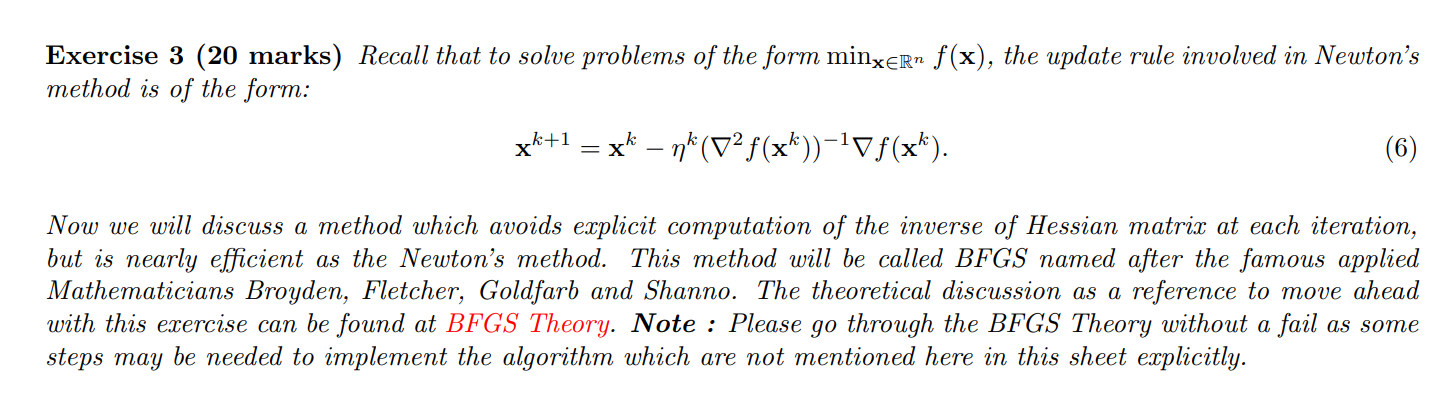





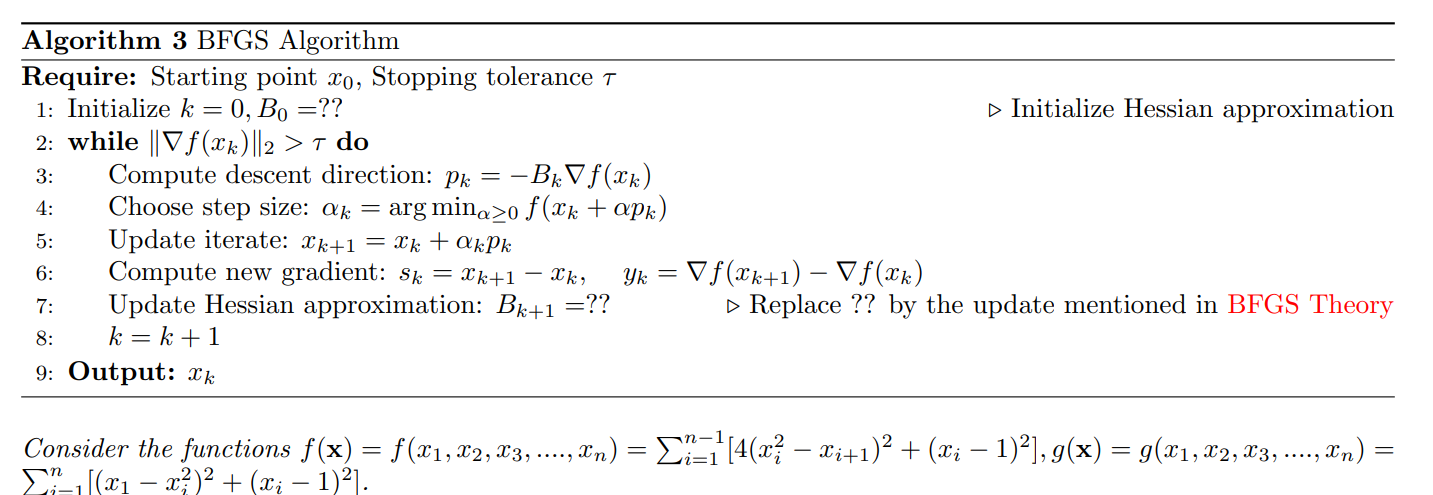

### Gradient of $ f(x)$:

The function $ f(x)$ is given by:
$ f(x) = P_{n-1} \prod_{i=1}^{n-1} [4(x_{i}^{2} - x_{i+1})^2 + (x_{i} - 1)^2] $

1. **Partial Derivative of $ f(x)$ with respect to $ x_i$:**

$ \frac{\partial f}{\partial x_i} = P_{n-1} \cdot \frac{\partial}{\partial x_i} \prod_{i=1}^{n-1} [4(x_{i}^{2} - x_{i+1})^2 + (x_{i} - 1)^2] $

2. **Using the Product Rule:**

$ \frac{\partial}{\partial x_i} \prod_{i=1}^{n-1} [4(x_{i}^{2} - x_{i+1})^2 + (x_{i} - 1)^2] = \sum_{j=1}^{n-1} \frac{\partial}{\partial x_i} [4(x_{j}^{2} - x_{j+1})^2 + (x_{j} - 1)^2] $

3. **Computing the Derivative Inside the Summation:**

   a. For the term $ 4(x_{j}^{2} - x_{j+1})^2:$

      $ \frac{\partial}{\partial x_i} [4(x_{j}^{2} - x_{j+1})^2] = 8(x_{j}^{2} - x_{j+1}) \cdot \frac{\partial}{\partial x_i} (x_{j}^{2} - x_{j+1}) $

   b. For the term $ (x_{j} - 1)^2:$

      $ \frac{\partial}{\partial x_i} [(x_{j} - 1)^2] = 2(x_{j} - 1) \cdot \frac{\partial}{\partial x_i} (x_{j} - 1) $

4. **Summing Up the Terms Over $ j$:**
$[ \frac{\partial f}{\partial x_i} = P_{n-1} \cdot \sum_{j=1}^{n-1} \left[ 8(x_{j}^{2} - x_{j+1}) \cdot \frac{\partial}{\partial x_i} (x_{j}^{2} - x_{j+1}) + 2(x_{j} - 1) \cdot \frac{\partial}{\partial x_i} (x_{j} - 1) \right] ]$

### Gradient of $ g(x)$:

The function $ g(x)$ is given by:
$ g(x) = \sum_{i=1}^{n} [(x_{1} - x_{i}^{2})^2 + (x_{i} - 1)^2] $

1. **Partial Derivative of $ g(x)$ with respect to $ x_i$:**

$ \frac{\partial g}{\partial x_i} = \frac{\partial}{\partial x_i} \sum_{i=1}^{n} [(x_{1} - x_{i}^{2})^2 + (x_{i} - 1)^2] $

2. **Differentiating Each Term Separately:**

   a. For the term $( (x_{1} - x_{i}^{2})^2 ):$

      $ \frac{\partial}{\partial x_i} [(x_{1} - x_{i}^{2})^2] = 2(x_{1} - x_{i}^{2}) \cdot \frac{\partial}{\partial x_i} (x_{1} - x_{i}^{2}) $

   b. For the term $( (x_{i} - 1)^2 \$:
      $ \frac{\partial}{\partial x_i} [(x_{i} - 1)^2] = 2(x_{i} - 1) \cdot \frac{\partial}{\partial x_i} (x_{i} - 1) $

Once we compute these partial derivatives, we can set them equal to zero and solve for $ x_i$ to find the critical points, i.e., the values of $ x_i$ at which the gradients vanish.
and these values are at for both function is 1 and minimum value of functions is 0
which means that $ x_i$ =0


As above function are sum of convex function therefore they are convex as we know that sum of convex function is convex.

Now we have to take initial $B_0$ we can take identity as best option because it is positive definite and invertible therefore it is best choice to initialise our algo.

In [1]:
#value of tau is not given therefore i take it to be 1e-6

In [2]:
import numpy as np



In [3]:
def fx(x):
  fx=[]
  for i in range(len(x)-1):
    f=(4*(x[i]**2-x[i+1])**2+(x[0]-1)**2)
    fx.append(f)
  return sum(fx)
def gradient_fx(xk):
  n = len(xk)
  grad = []
  grad.append( 16*xk[0]*(xk[0]**2 - xk[1]) + 2*(xk[0]-1) )
  for i in range(1, n-1):
    grad.append(  -8*(xk[i-1]**2 - xk[i]) + 16*xk[i]*(xk[i]**2 - xk[i+1]) + 2*(xk[i]-1) )
  grad.append(-8*(xk[n-2]**2 - xk[n-1]))
  return np.array(grad)
fx([0,0,0,0,0,0,0,0,0,0])

9

In [4]:
a=[[2,4],[4,4]]
a=np.array(np.shape(a))

print(a[0])
i=np.eye(a[0])
i

2


array([[1., 0.],
       [0., 1.]])

In [11]:
# def backtracking(x):
#   gamma=0.5
#   alpha=0.9
#   rho=0.5
#   #print(grad_fx(x))

#   pk=-1*gradient_fx(x)

#   k=0
#   while np.array(fx(np.array(x)+alpha*pk))>(np.array(fx(x))+gamma*alpha*(gradient_fx(x)@pk)):
#     alpha=rho*alpha
#     k+=1
#     return alpha
def backtracking(xk, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -gradient_fx(xk)
  while fx(xk + alpha*Bk@pk) > (fx(xk) + gamma*alpha*gradient_fx(xk)@Bk@pk):
    alpha = rho*alpha
  return alpha


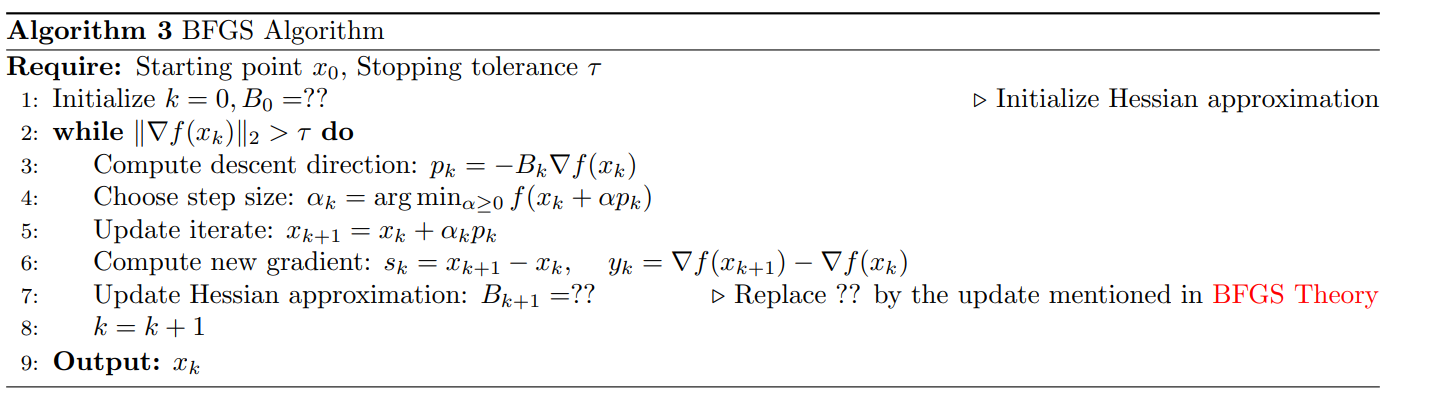

In [6]:
import numpy as np

# Example 1D array
x = np.array([1, 2, 3])  # Adjust the array as per your requirements

# Reshape the 1D array into a column vector (1 x n)
x = x.reshape(1, -1)

# Multiply the array by its transpose to get an n x n matrix
result_matrix =  x @ x.T

print("Resulting Matrix (x * x^T):\n", result_matrix)

Resulting Matrix (x * x^T):
 [[14]]


In [12]:
def bfgs(x,n):
  k=0
  alpha0=0.9
  gamma=0.5
  rho=0.5
  x=np.transpose(x)
  tau=3
  B0=np.eye(n)
  fx_norm=np.linalg.norm(fx(x))
  iteration=[]
  Bk=B0
  while fx_norm>tau:
    pk=-Bk@(gradient_fx(x))
    alpha=backtracking(x, alpha0, rho, gamma, Bk)
    xprev=x
    x=x+alpha*pk
    sk=x-xprev
    print(sk)
    yk=gradient_fx(x)-gradient_fx(xprev)
    yk=yk

    mu=1/(yk@sk)

    m=len(x)

    v=len(x)

    Bprev=Bk
    Bk=(np.eye(m)-mu*sk@(np.transpose(yk)))@Bk@(np.eye(v)-mu*yk@(np.transpose(sk)))+mu*sk@(np.transpose(sk))
    k=k+1
  iteration.append(k)
  return iteration
bfgs([0 for i in range(1000)],1000)


Streaming output truncated to the last 5000 lines.
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224
  1.224  1.224  1.224  1.224  1.224  1.224  1.224  1.224 14.184 -6.48 ]
0.0008996734545229469
1000
1000 1000
[0.08244968 0.08244961 0.08244961 0.08244961 0.08244961 0.0

KeyboardInterrupt: 